In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data Loading
url = 'employee_retention_data.csv'
df = pd.read_csv(url)
print(df.shape)
df.head(7)

(24702, 7)


,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30
6,88600.0,4,customer_service,21,107000.0,2013-10-21,NaN


In [4]:
# Fill the NA value to the end date
df['quit_date'].fillna('2015-12-13', inplace=True)
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [5]:
# What are the main factors that drive employee churn? Do they make sense? Explain your findings.
  # First calcuate how long the employee stays
from datetime import datetime
date_format = "%Y-%m-%d"
L = []
for n in range (df.shape[0]):
    de = datetime.strptime(df.iloc[n,6], date_format) - datetime.strptime(df.iloc[n,5], date_format)
    day = de.days
    L.append(day)
df['Duration'] = L
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,Duration
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13,426
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040


[[1.         0.06737817]
 [0.06737817 1.        ]]
[[1.         0.07006966]
 [0.07006966 1.        ]]
[[1.         0.01039184]
 [0.01039184 1.        ]]
[[1.         0.01988548]
 [0.01988548 1.        ]]
[[1.         0.07257616]
 [0.07257616 1.        ]]
[[1.         0.07614138]
 [0.07614138 1.        ]]
[[1.         0.00438295]
 [0.00438295 1.        ]]
[[1.        0.0169733]
 [0.0169733 1.       ]]
[[ 1.         -0.00559276]
 [-0.00559276  1.        ]]
[[1.         0.03952579]
 [0.03952579 1.        ]]
[[ 1.         -0.03324835]
 [-0.03324835  1.        ]]
[[1.         0.44706565]
 [0.44706565 1.        ]]


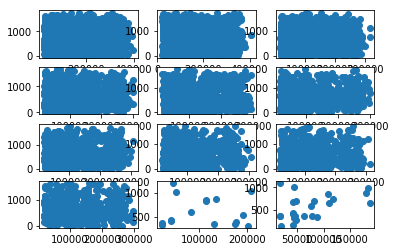

In [6]:
# EDA 1: relationship between salary & Duration
for n in range(1,13):
    com = df[df.company_id==n]
    X = com['salary']
    Y = com['Duration']
    plt.subplot(4,3,n) # subplot(number of rows, number of columns)
    print(plt.scatter(X,Y))
    print(np.corrcoef(X,Y)) # Pearson product-moment correlation coefficients
                            # https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.corrcoef.html

[[1.        0.0140845]
 [0.0140845 1.       ]]
[[1.         0.00329469]
 [0.00329469 1.        ]]
[[ 1.         -0.01345229]
 [-0.01345229  1.        ]]
[[ 1.         -0.01863658]
 [-0.01863658  1.        ]]
[[1.        0.0177741]
 [0.0177741 1.       ]]
[[1.         0.00132807]
 [0.00132807 1.        ]]
[[ 1.         -0.04492143]
 [-0.04492143  1.        ]]
[[ 1.         -0.00889593]
 [-0.00889593  1.        ]]
[[ 1.         -0.01473089]
 [-0.01473089  1.        ]]
[[ 1.         -0.01107356]
 [-0.01107356  1.        ]]
[[ 1.         -0.06123388]
 [-0.06123388  1.        ]]
[[1.        0.4242936]
 [0.4242936 1.       ]]


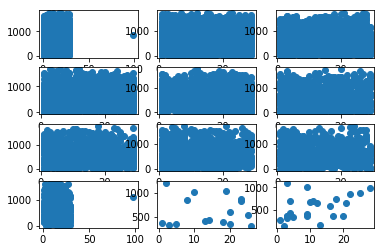

In [7]:
# EDA 2: relationship between seniority & Duration
for n1 in range(1,13):
    sen = df[df.company_id==n1]
    X1 = sen['seniority']
    Y1 = sen['Duration']
    plt.subplot(4,3,n1) # subplot(number of rows, number of columns)
    print(plt.scatter(X1,Y1))
    print(np.corrcoef(X1,Y1))

/home/czl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


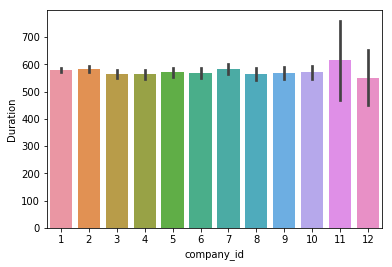

In [8]:
# EDA 3: relationship between company & Duration
sns.barplot(x='company_id',y='Duration',data=df)

AxesSubplot(0.125,0.71587;0.227941x0.16413)
AxesSubplot(0.398529,0.71587;0.227941x0.16413)
AxesSubplot(0.672059,0.71587;0.227941x0.16413)
AxesSubplot(0.125,0.518913;0.227941x0.16413)
AxesSubplot(0.398529,0.518913;0.227941x0.16413)
AxesSubplot(0.672059,0.518913;0.227941x0.16413)
AxesSubplot(0.125,0.321957;0.227941x0.16413)
AxesSubplot(0.398529,0.321957;0.227941x0.16413)
AxesSubplot(0.672059,0.321957;0.227941x0.16413)
AxesSubplot(0.125,0.125;0.227941x0.16413)
AxesSubplot(0.398529,0.125;0.227941x0.16413)
AxesSubplot(0.672059,0.125;0.227941x0.16413)


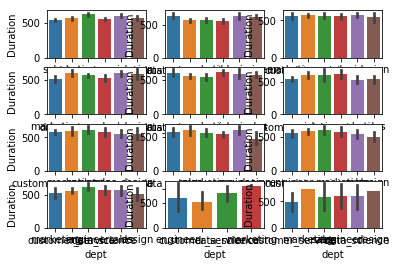

In [9]:
# EDA 4: relationship between dept & Duration
for n2 in range(1,13):
    dept = df[df.company_id==n2]
    X2 = dept['dept']
    Y2 = dept['Duration']
    plt.subplot(4,3,n2) # subplot(number of rows, number of columns)
    print(sns.barplot(X2,Y2,data=dept))

In [10]:
## Part 2. Build classifier to predict retenstion
  # 1st: splitting datasets into two parts: group 0 (duration < 1.5 year) & group 1 (duration >= 1.5 year)

Li =[]
for l in range(df.shape[0]):
    if df.iloc[l,-1] < 545: # Set 1.5 year as criteria
        Li.append(df.iloc[l,-1] )
len(Li)

13892

In [11]:
## Add a new column: if Duration < 1.5 year, label 0; otherwise: labe 1
l=[]
for z in range(df.shape[0]):
    if df.iloc[z,-1] < 545:
        l.append(0)
    else:
        l.append(1)
df['Group'] = l
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,Duration,Group
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340,0
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13,426,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389,0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040,1


In [13]:
## 2nd: Test Random Forest Classifier 

neww_df = df.drop(['employee_id', 'join_date','quit_date','Duration'],axis=1)
y_df = neww_df['Group']

neww_df.head() # this is the new data frame that we need to make predictions: 
                # Four features:company_id / dept / seniority / salary; 1 label

,company_id,dept,seniority,salary,Group
0,7,customer_service,28,89000.0,1
1,7,marketing,20,183000.0,0
2,4,marketing,14,101000.0,0
3,7,customer_service,20,115000.0,0
4,2,data_science,23,276000.0,1


In [14]:
## Before splitting dataset, we must convert "dept" to dummy features for machine learning

# Create dummy variables for department feature
new_df = pd.get_dummies(neww_df, columns=["dept"])
new_df.head(7)

,company_id,seniority,salary,Group,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
0,7,28,89000.0,1,1,0,0,0,0,0
1,7,20,183000.0,0,0,0,0,0,1,0
2,4,14,101000.0,0,0,0,0,0,1,0
3,7,20,115000.0,0,1,0,0,0,0,0
4,2,23,276000.0,1,0,1,0,0,0,0
5,4,14,165000.0,1,0,1,0,0,0,0
6,4,21,107000.0,1,1,0,0,0,0,0


In [15]:
# Split training set & test set
import sklearn
from sklearn.model_selection import train_test_split
X_train_di, X_test_di, y_train_di, y_test_di = train_test_split(new_df, y_df, test_size=0.2, stratify=new_df['Group']) # 20% sample as test
X_train = X_train_di.drop(['Group'],axis=1)
X_test = X_test_di.drop(['Group'],axis=1)
y_train = y_train_di
y_test = y_test_di

In [16]:
X_train.head()

,company_id,seniority,salary,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
6083,9,6,154000.0,0,1,0,0,0,0
5072,1,17,124000.0,1,0,0,0,0,0
11032,1,25,179000.0,0,0,0,0,1,0
24208,5,9,91000.0,0,0,1,0,0,0
2178,1,13,223000.0,0,1,0,0,0,0


In [17]:
## Model 1: Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X =  X_train
y = y_train
grid = {
          'n_estimators': np.power(2, np.arange(0, 10)) # record: 10
        }

clf = RandomForestClassifier(max_depth=3, random_state=1)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=5) # Cross-Validation: fine-tune parameters
gs.fit(X, y)

print ('gs.best_score_:', gs.best_score_)
print ('gs.best_params_:', gs.best_params_ )

gs.best_score_: 0.5705682910783867
gs.best_params_: {'n_estimators': 512}


In [18]:
## Output & Accuracy
clf = RandomForestClassifier(max_depth=3, random_state=1, n_estimators=512)
clf.fit(X, y)

print(clf.predict(X_test))

import sklearn
sklearn.metrics.accuracy_score(y_test, clf.predict(X_test), normalize=True, sample_weight=None)

[1 0 0 ... 0 0 0]


0.568508399109492

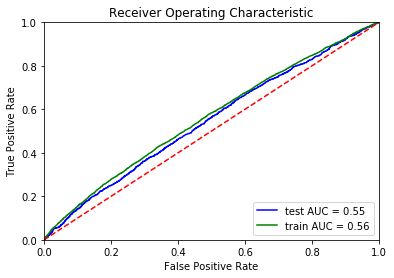

In [19]:
## Calculate AUC
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score
y_test_true = y_test
y_test_probas = clf.predict_proba(X_test)[:,1]

y_train_true = y_train
y_train_probas = clf.predict_proba(X_train)[:,1]

fpr_test, tpr_test, threshold_test = metrics.roc_curve(y_test_true, y_test_probas,pos_label=1) # Check label 2 meaning
roc_auc_test = metrics.auc(fpr_test, tpr_test)

#print(roc_auc_test)

fpr_train, tpr_train, threshold_train = metrics.roc_curve(y_train_true, y_train_probas,pos_label=1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'test AUC = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'train AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

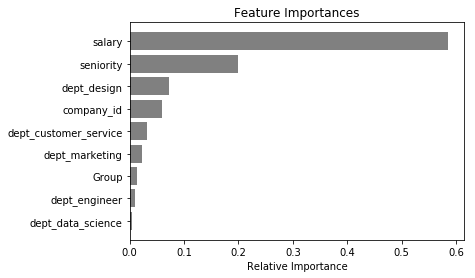

In [20]:
## Last step: Identify important features based on random forest result! (2019.02.05)
#features = Gene_100
features = list(new_df)
importances = clf.feature_importances_
indices = np.argsort(importances)

import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='gray', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [31]:
## Model 2: Logistic Regression
from sklearn.linear_model import LogisticRegression

grid_L={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid_L,scoring="accuracy",cv=10)
logreg_cv.fit(X_train, y_train)

/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
print(logreg_cv.predict(X_test))

import sklearn
sklearn.metrics.accuracy_score(y_test, logreg_cv.predict(X_test), normalize=True, sample_weight=None)

[0 0 0 ... 0 0 0]


0.5713418336369156

In [38]:
print("\033[1m" + "\033[0m" + "The best hyperparameters:")
print("-" * 25)
print("\033[1m" + "\033[94m" + "Best 10-folds CV f1-score: {:.2f}%.".format((logreg_cv.best_score_) * 100))

The best hyperparameters:
-------------------------
Best 10-folds CV f1-score: 56.73%.
